In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Embedding, Concatenate, Reshape, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import random
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.shape

(569, 31)

Data Distribution


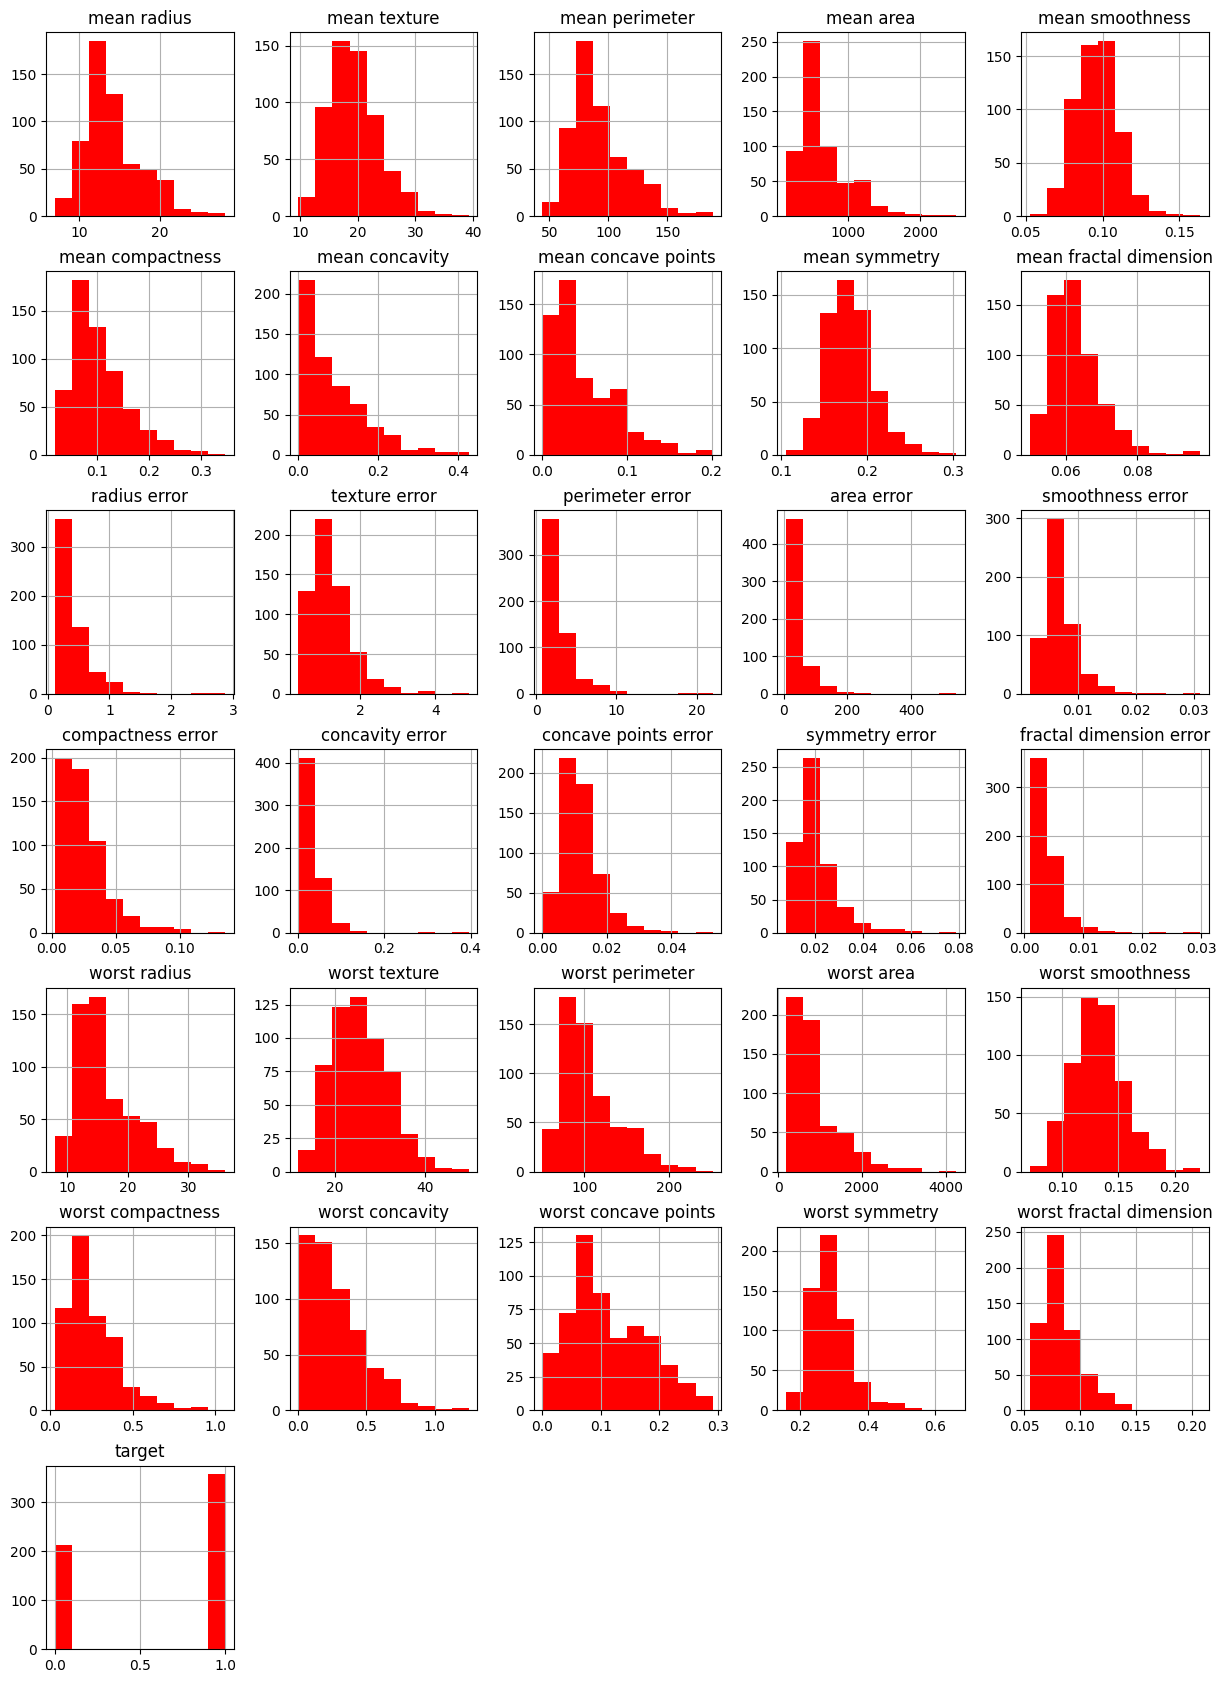

In [7]:
num_cols = len(df.select_dtypes(include=np.number).columns)
num_rows = (num_cols + 4) // 5  # Calculate the number of rows needed
df.hist(layout=(num_rows, 5), figsize=(15, num_rows * 3), color='r')  # Adjust figsize accordingly
print('Data Distribution')

This looks like a fairly imbalanced dataset


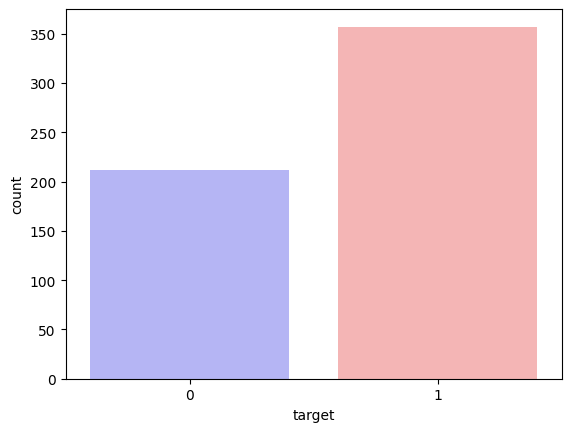

In [8]:
print('This looks like a fairly imbalanced dataset')
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [9]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [10]:
print('Percentage of data belonging to class 1 is',int((357/569)*100))
print('Percentage of data belonging to class 0 is',int((212/569)*100))

Percentage of data belonging to class 1 is 62
Percentage of data belonging to class 0 is 37


In [11]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [12]:
df.duplicated().any()

np.False_

In [13]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

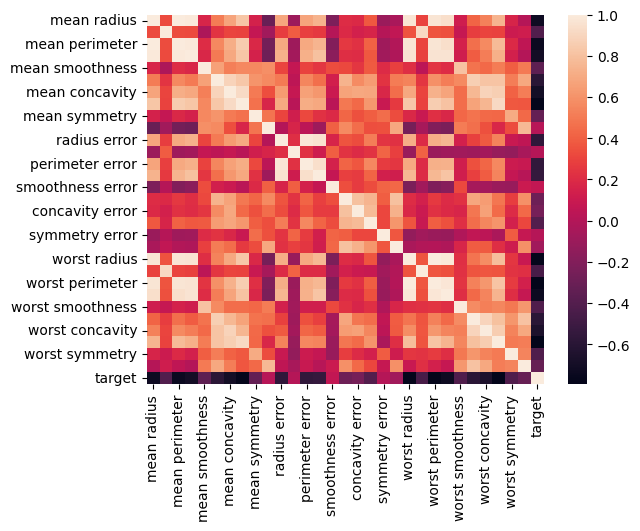

In [14]:
print(df.corr()['target'])
sns.heatmap(df.corr())
plt.show()

In [15]:
df[(df['mean radius'] == 0)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


In [16]:
top_corr_features = df.corr()['target'].abs().sort_values(ascending=False).iloc[1:10].index.tolist()
top_corr_features

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area',
 'mean concavity']

In [17]:
feature_engg_data = df.copy()
outlier_data = df.copy()
factor = 3
# Include this only for columns with suspected outliers
# Using a factor of 3, following Nelson's rule 1 to remove outliers 
# Only for non-categorical fields
columns_to_include = top_corr_features
for column in columns_to_include:
    upper_lim = feature_engg_data[column].mean () + feature_engg_data[column].std () * factor
    lower_lim = feature_engg_data[column].mean () - feature_engg_data[column].std () * factor
    feature_engg_data = feature_engg_data[(feature_engg_data[column] < upper_lim) & (feature_engg_data[column] > lower_lim)]
    
outlier_data = pd.concat([outlier_data, feature_engg_data]).drop_duplicates(keep=False)

print(feature_engg_data.shape)
print(outlier_data.shape)

(539, 31)
(30, 31)


In [18]:
def normalize_data(df):
    val = df.values 
    min_max_normalizer = preprocessing.MinMaxScaler()
    norm_val = min_max_normalizer.fit_transform(val)
    df2 = pd.DataFrame(norm_val, columns=df.columns)
    
    return df2

norm_feature_engg_data = normalize_data(feature_engg_data)
norm_outlier_data = normalize_data(outlier_data)

In [19]:
input_data = norm_feature_engg_data.drop(['target'],axis='columns')
targets =norm_feature_engg_data.filter(['target'],axis='columns')

x, x_test, y, y_test = train_test_split(input_data,targets,test_size=0.1,train_size=0.9, random_state=5)
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size = 0.22,train_size =0.78, random_state=5)

In [20]:
def apply_RFC(X,y,columns):
    rfc = RFC(n_estimators=500,min_samples_leaf=round(len(X)*.01),random_state=5,n_jobs=-1)
    imp_features = rfc.fit(X,y).feature_importances_ 
    imp_features = pd.DataFrame(imp_features,columns=['Feature Importance'],index=columns)
    imp_features.sort_values(by=['Feature Importance'],inplace=True,ascending=False)
    imp_features['Moving Sum'] = imp_features['Feature Importance'].cumsum()
    imp_features = imp_features[imp_features['Moving Sum']<=0.95]
    top_features = imp_features.index.tolist()
    return imp_features, top_features

important_features, top_features = apply_RFC(x,y, df.columns.drop('target'))
sns.barplot(x=important_features['Feature Importance'],y= important_features.index, palette = 'tab10')
plt.title('Random Forest Feature Importance for: '+"Breast Cancer Dataset")
plt.show()

In [21]:
# train a model with a neural network architecture.
def model():
    '''
    Simple 3 layered Neural Network model for binary classification
    '''
    inp = Input(shape=(x_train.shape[1],))
    x = Dense(40, activation='relu')(inp)
    x = Dense(40, activation='relu')(x)
    op = Dense(2, activation='softmax')(x)
    model = Model(inputs=inp, outputs=op)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = model()
model.fit(x_train, to_categorical(y_train), batch_size=64, epochs=100, verbose=0)

In [22]:
# Evaluate the trained model
model.evaluate(x_test, to_categorical(y_test))[1]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0203 


1.0

In [23]:
query_instance = x_test.iloc[5].values.reshape((1,) + x_test.iloc[5].shape)
print("Let's take a look at the normalized query data instance in which all the features are in the range of (0.0 - 1.0):" )
df_query = pd.DataFrame(query_instance, columns = input_data.columns)
df_query

Let's take a look at the normalized query data instance in which all the features are in the range of (0.0 - 1.0):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.325996,0.265472,0.319054,0.221132,0.493545,0.293929,0.181263,0.284251,0.271717,0.354044,...,0.296277,0.425373,0.297293,0.179353,0.420855,0.153399,0.116752,0.347916,0.179972,0.147776


In [24]:
predicted_outcome = np.argmax(model.predict(query_instance))
true_label = int(y_test.iloc[5][0])
print(f" The true label is : {true_label}")
print(f" The predicted outcome is : {predicted_outcome}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
 The true label is : 1
 The predicted outcome is : 1


In [25]:
sigma_worstradius = np.std(x['worst radius'])
sigma_worstperimeter = np.std(x['worst perimeter'])
sigma_worstarea = np.std(x['worst area'])
sigma_worstconcavepoints = np.std(x['worst concave points'])
sigma_meanconcavepoints = np.std(x['mean concave points'])
sigma_meanconcavity = np.std(x['mean concavity'])
sigma_meanperimeter = np.std(x['mean perimeter'])
sigma_meanarea = np.std(x['mean area'])
sigma_meanradius = np.std(x['mean radius'])
sigma_areaerror = np.std(x['area error'])  # Optional
# sigma_worstconcavity = np.std(x['worst concavity'])  # Optional


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


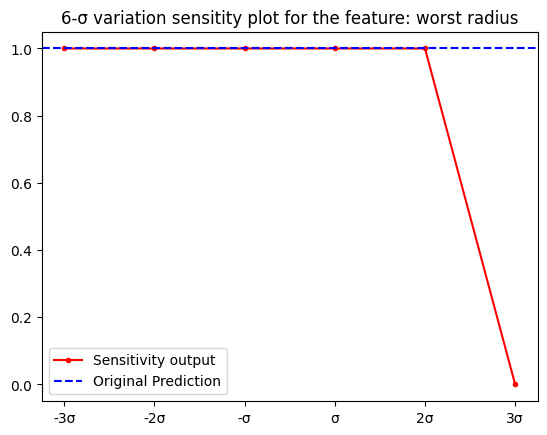

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


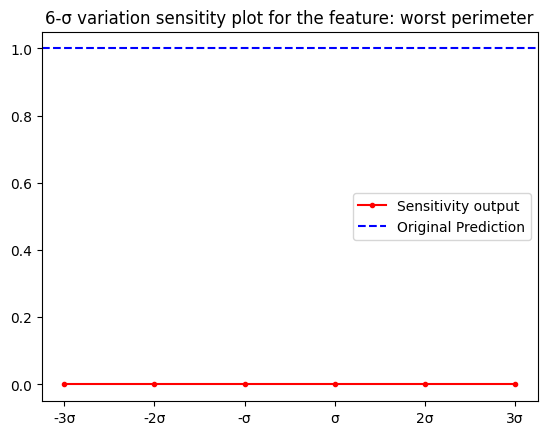

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


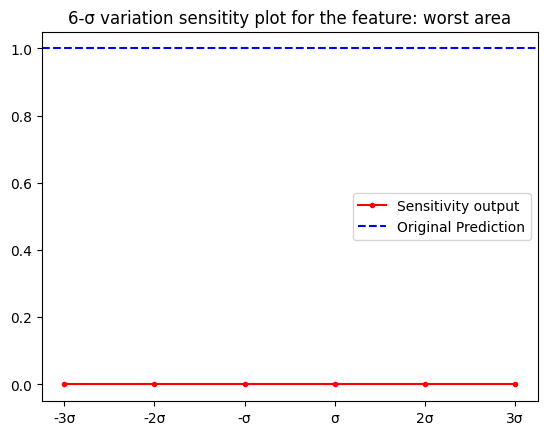

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


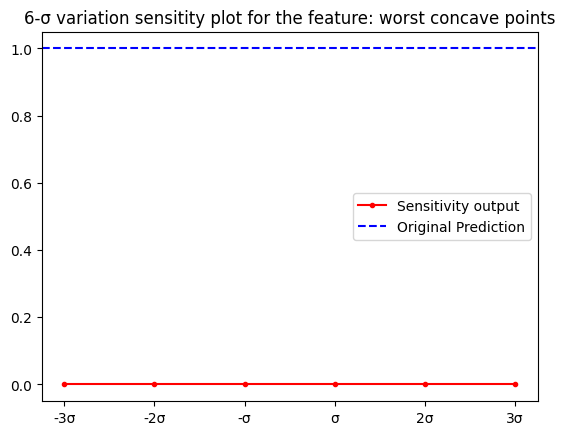

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


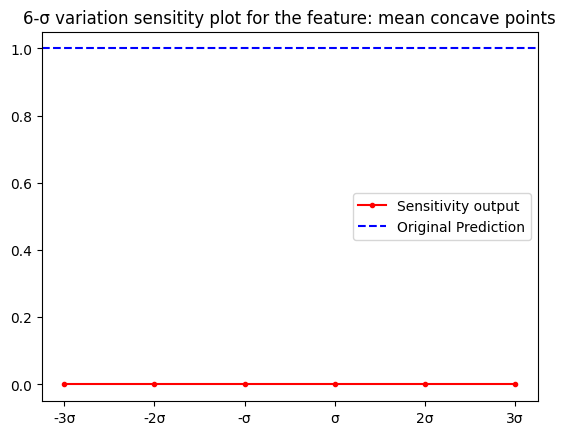

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


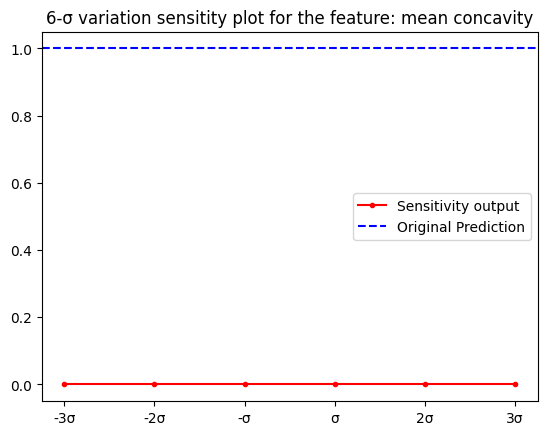

In [26]:
# sensitivity analysis plots
def sensitivity_analysis_plot(measure_tuple):
    '''
    Sensitivity Analysis plot using the 6-σ variation method
    '''
    (measure, sigma) = measure_tuple

    sensitivity_output = []
    original_value = df_query[measure].copy()
    for k in [-3, -2, -1, 1, 2, 3]:
        df_query[measure] = original_value.copy()
        df_query[measure] = np.clip(df_query[measure] + k * sigma, 0.0, 1.0)
        sensitivity_output.append(np.argmax(model.predict(df_query.values)))
    plt.plot(['-3σ', '-2σ', '-σ', 'σ', '2σ', '3σ'], sensitivity_output, 'r.-', label = 'Sensitivity output')
    plt.axhline(y = predicted_outcome, color = 'b', linestyle = '--', label = 'Original Prediction')
    plt.title(f'6-σ variation sensitity plot for the feature: {measure}')
    plt.legend()
    plt.show()


    
measure_tuple_list = [('worst radius', sigma_worstradius),
                     ('worst perimeter', sigma_worstperimeter),
                     ('worst area', sigma_worstarea),
                     ('worst concave points', sigma_worstconcavepoints),
                     ('mean concave points', sigma_meanconcavepoints),
                     ('mean concavity', sigma_meanconcavity),
                    ]

for measure_tuple in measure_tuple_list:
    sensitivity_analysis_plot(measure_tuple)

### CONCLUSION
In this code, both global and local feature importance methods were used. While global methods (Random Forest feature importance) consistently ranked features like worst perimeter, worst concave points, and worst radius as most influential across the dataset, local sensitivity analysis revealed instance-dependent behavior. For some test cases, certain features strongly influenced the prediction, while for others, they had no effect, despite being globally important.

This reinforces the need for instance-level explainability in healthcare ML models — especially where individual predictions can impact critical decisions. Overall, combining global and local interpretability offers a more complete understanding of model behavior.